# Malan Moody
# CSC792
# 6/7/2021
# Project 01

In [1]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

### Input Data

In [2]:
images = []
imageClass = []

# Load each image and its class into the images and imageClass array respectively
# images will hold 2d arrays representing each image, with each element representing a pixel value
# imageClass will hold the class value of each image: 0 for normal lungs, 1 for abnormal lungs
for filename in os.listdir('./CXR_png'):
    if filename.endswith(".png"):
        images.append(cv.imread('./CXR_png/'+filename, 0))
        if filename.endswith("1.png"):
            imageClass.append(1)
        elif filename.endswith("0.png"):
            imageClass.append(0)
        print(filename)

MCUCXR_0001_0.png
MCUCXR_0002_0.png
MCUCXR_0003_0.png
MCUCXR_0004_0.png
MCUCXR_0005_0.png
MCUCXR_0006_0.png
MCUCXR_0008_0.png
MCUCXR_0011_0.png
MCUCXR_0013_0.png
MCUCXR_0015_0.png
MCUCXR_0016_0.png
MCUCXR_0017_0.png
MCUCXR_0019_0.png
MCUCXR_0020_0.png
MCUCXR_0021_0.png
MCUCXR_0022_0.png
MCUCXR_0023_0.png
MCUCXR_0024_0.png
MCUCXR_0026_0.png
MCUCXR_0027_0.png
MCUCXR_0028_0.png
MCUCXR_0029_0.png
MCUCXR_0030_0.png
MCUCXR_0031_0.png
MCUCXR_0035_0.png
MCUCXR_0038_0.png
MCUCXR_0040_0.png
MCUCXR_0041_0.png
MCUCXR_0042_0.png
MCUCXR_0043_0.png
MCUCXR_0044_0.png
MCUCXR_0045_0.png
MCUCXR_0046_0.png
MCUCXR_0047_0.png
MCUCXR_0048_0.png
MCUCXR_0049_0.png
MCUCXR_0051_0.png
MCUCXR_0052_0.png
MCUCXR_0053_0.png
MCUCXR_0054_0.png
MCUCXR_0055_0.png
MCUCXR_0056_0.png
MCUCXR_0057_0.png
MCUCXR_0058_0.png
MCUCXR_0059_0.png
MCUCXR_0060_0.png
MCUCXR_0061_0.png
MCUCXR_0062_0.png
MCUCXR_0063_0.png
MCUCXR_0064_0.png
MCUCXR_0068_0.png
MCUCXR_0069_0.png
MCUCXR_0070_0.png
MCUCXR_0071_0.png
MCUCXR_0072_0.png
MCUCXR_007

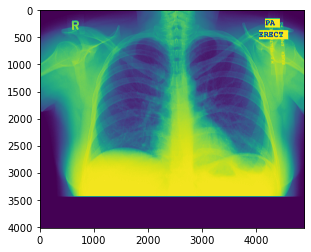

In [3]:
plt.figure()
plt.imshow(images[0])

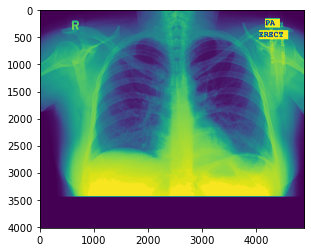

In [4]:
# Perform histogram equalization on each image
for i in range(len(images)):
    images[i] = cv.equalizeHist(images[i])

plt.figure()
plt.imshow(images[0])

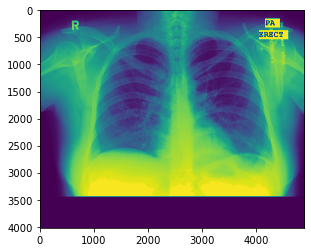

In [5]:
# Normalize the pixel values in each image to be between 0 and 1
for i in range(len(images)):
    images[i] = cv.normalize(images[i], None, 0, 1, cv.NORM_MINMAX, dtype=cv.CV_32F)

plt.figure()
plt.imshow(images[0])

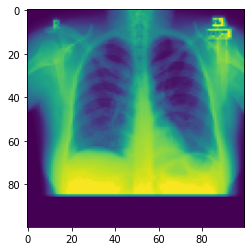

In [6]:
# Resize each image from 4000x4892 or 4892x4000 to 100x100
for i in range(len(images)):
    images[i] = cv.resize(images[i], (100, 100), interpolation = cv.INTER_AREA)

plt.figure()
plt.imshow(images[0])

In [7]:
imageVectors = []

# Convert each 100x100 2d array into a 1d array of length 10000, and append each new 1d array to imageVectors
# imageVectors will hold the 1d feature vector for each image
for image in images:
    featureVector = []
    for j in range(image.shape[0]):
        for k in range(image.shape[1]):
            featureVector.append(image[j,k])
    imageVectors.append(featureVector)

### Neural Network

In [53]:
# Split the X (imageVectors) and y (imageClass) arrays into training and testing sets using an 80:20 split
X_train, X_test, y_train, y_test = train_test_split(imageVectors, imageClass, test_size=0.2)

In [54]:
# Create our multi-layer perceptron neural network and fit our training data to it
# For the neural network, we have 3 hidden layers with 100 nodes each
# The logistic sigmoid function is used as our activation function
clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100))
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100))

In [55]:
# Predict the y values for our testing set
y_pred = clf.predict(X_test)

In [56]:
# Compare the predicted y values to the actual y values of the testing set
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,0
7,0,0
8,1,1
9,0,0


In [57]:
# Accuracy score
acs = accuracy_score(y_test, y_pred)
print('Accuracy Score')
print(f'{acs * 100}%')

Accuracy Score
82.14285714285714%


In [58]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[14  2]
 [ 3  9]]


In [59]:
# Calculate precision, recall/sensitivity, specificity, and f-score
p = cm[0][0] / (cm[0][0] + cm[1][0])
r = cm[0][0] / (cm[0][0] + cm[0][1])
sp = cm[1][1] / (cm[1][1] + cm[1][0])
f = 2*p*r / (p + r)

print('Precision')
print(p)
print()
print('Recall/Sensitivity')
print(r)
print()
print('Specificity')
print(sp)
print()
print('F-score')
print(f)

Precision
0.8235294117647058

Recall/Sensitivity
0.875

Specificity
0.75

F-score
0.8484848484848485


In [60]:
# Get the classification report to confirm our calculations
cr = classification_report(y_test, y_pred)
print('Classification Report')
print()
print(cr)

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.82      0.75      0.78        12

    accuracy                           0.82        28
   macro avg       0.82      0.81      0.82        28
weighted avg       0.82      0.82      0.82        28



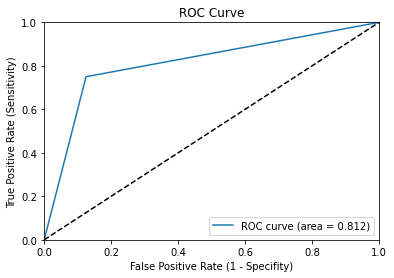

In [61]:
# Plot the ROC curve for our neural network
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specifity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")